<a href="https://colab.research.google.com/github/EthanRohman/CS167-Project-2/blob/main/Project_2_Rohman_Refined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

Name: Ethan Rohman
Date: December 10, 2021

## Problem:

The problem I am trying to solve with this machine learning experiment is to determine the sentiment of a movie review. The data used for this experiment contains the text from the movie review and whether it is a positive review or a negative one. The goal of these machine learning models is to predict the sentiment of the review based on the text of the review. A machine learning model that uses language to predict some things or to generate more language.

# Input Pipeline (sklearn):

In [20]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

In [21]:
#Number of Samples
data.shape

(50000, 2)

In [22]:
#Number of Classes of the Target Variable
data["sentiment"].drop_duplicates().values 

array(['positive', 'negative'], dtype=object)

In [23]:
#Median number of words in one sample
data['length'] = [len(r.split()) for r in data['review'].tolist()]
data['length'].median()

173.0

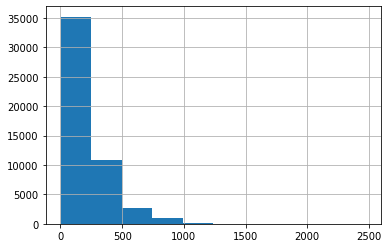

In [24]:
#Distribution of sample length
data['length'].hist()

In [25]:
#Percentange of reviews over 1000 words that are positive
review_over_1000 = data[data['length']>1000]
percentage = (review_over_1000[review_over_1000['sentiment']=='positive'].shape[0]/review_over_1000.shape[0]) *100
print('Percentage of positive reviews over 1000 words:',percentage,"%")

percent = (data[data['sentiment']=='positive'].shape[0]/data.shape[0]) *100
print('percentage of positive reviews:', percent,"%")

Percentage of positive reviews over 1000 words: 59.756097560975604 %
percentage of positive reviews: 50.0 %


- The total number of samples in the dataset is 50,000
- The number of categories in the dataset is 2. Each review is either positive or negative. 
- The median number of words per sample is 173 words. 
- The histogram shows that the majority of reviews are 250 words or less. 
- When looking at the number of reviews over 1000 words there is a greater percentage of them that are positive than the dataset as a whole. 

## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [26]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In the code cell above the stop words were downloaded. 

In [27]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In the code cell above all of the punctuation and non-letter characters are removed from the reviews. After all of the non-letter characters are removed, all of the letters are converted to lowercase, and the stop words are removed from the reviews.


In [28]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

The code cell above iterates throught the reviews and applies the function above to them. 

In [29]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

As shown above, all of the reviews are cleaned and now ready to be split and vectorized. 

In [30]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

This cell splits the data into two sections, with 80% of it being used to train the set and the other 20% being used to test the set. 

# Metrics

The metrics used to test the effetiveness of each machine learning model is accuracy, but when doing the principal component analysis the metric used to determine feature importance is variance. 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [31]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

The code above converts each review into a list of numbers so that they can be used in machine learning algorithms. 

# Model Planning 

I will be using a Support Vector Classifier, Principal Component Analysis,Perceptron, and Multilayer perceptron. For the SVC I will be tuning the C variable. For the PCA I will be creating a graph of the newly transformed data after it has been reduced dimensionally. The Perceptron will be tuned using the eta variable. Finally, the MLP I will be using is____

Accuracy at C value  0.05 0.7967
Accuracy at C value  0.1 0.8085
Accuracy at C value  0.5 0.827
Accuracy at C value  0.75 0.8297
Accuracy at C value  1 0.8307
Accuracy at C value  2 0.8324
Accuracy at C value  5 0.8292
Accuracy at C value  10 0.8263
Accuracy at C value  20 0.8218
Accuracy at C value  50 0.8117


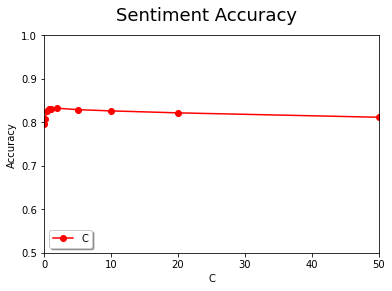

In [13]:
#Tuned SVC
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

C_vals = [.05,.1,.5,.75,1,2,5,10,20,50]
SVC_acc = []

for C in C_vals:
  svc = SVC(C=C)
  svc.fit(train_data_vectors,train_sln)
  svc_predictions = svc.predict(test_data_vectors)
  SVC_acc.append(metrics.accuracy_score(test_sln,svc_predictions))
  print("Accuracy at C value ", C, metrics.accuracy_score(test_sln,svc_predictions))


plt.suptitle('Sentiment Accuracy',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(C_vals,SVC_acc,'ro-',label='C')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,50,.5,1])

plt.show()

The support vector classifier predicted the sentiment of a review correctly about 83% of the time. The best C value for the support vectore classifier is 2. 

this is the variance/importance of each component
[0.27172574 0.05478849 0.04816953]


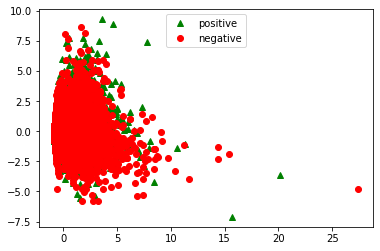

In [32]:
#Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#whiten = True is important for uncorrelated
#attributes, and is False by default
extractor = PCA(n_components=3, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data_vectors)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)

#transform data
train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

#visualizing the new axes
#PCA gives it back as numpy array
tdf = pandas.DataFrame(train_transformed)
#next line: probably not the best way
tdf['sentiment'] = pandas.Series(list(train_sln)) 


positive_series = tdf[ tdf['sentiment'] == 'positive' ]
negative_series = tdf[ tdf['sentiment'] == 'negative' ]

plt.plot(positive_series[0],positive_series[1],'g^',label='positive')
plt.plot(negative_series[0],negative_series[1],'ro',label='negative')
plt.legend(loc='upper center')
plt.show()

The greatest importance for any component was .27 which is not a very large number which means that the data is not easily separable and there is not an overly important feature in the reviews. 

In [33]:
#Perceptron
from sklearn.linear_model import Perceptron
from sklearn import metrics
import matplotlib.pyplot as plot
%matplotlib inline

#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

eta_vals = [.05,.1,.5,.75,1,2,5,10,20,50]
perc_acc = []

for eta in eta_vals:
  perc = Perceptron()
  perc.fit(train_data_vectors,train_sln)
  sentiment_perc_predictions = perc.predict(test_data_vectors)
  perc_acc.append(metrics.accuracy_score(test_sln, sentiment_perc_predictions))
  print("Accuracy of Perceptron with eta ", eta, ":", metrics.accuracy_score(test_sln, sentiment_perc_predictions)


plot.suptitle('Perceptron Sentiment Accuracy',fontsize=18)
plot.xlabel('eta')
plot.ylabel('Accuracy')
plot.plot(eta_vals,perc_acc,'ro-',label='eta')
plot.legend(loc='lower left', shadow=True)
plot.axis([0,50,.5,1])

plot.show()


SyntaxError: ignored

The tuning of the eta parameter did not seem to affect the accuracy of the perceptron machine learning model. The accuracy of this model was slightly less than that of the SVC. The accuracy seems to be about 79%.  

Accuracy at layer  50 : 0.7957
Accuracy at layer  100 : 0.8103
Accuracy at layer  200 : 0.8164
Accuracy at layer  300 : 0.8209
Accuracy at layer  400 : 0.8216
Accuracy at layer  500 : 0.8275
Accuracy at layer  1000 : 0.824


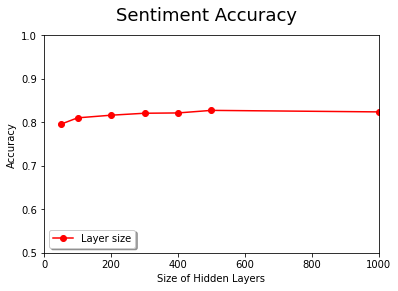

In [34]:
#Multilayer Perceptron
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plot
%matplotlib inline

#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

layer_vals = [50,100,200,300,400,500,1000]
mlp_acc = []

for layer in layer_vals:
  mlp = MLPClassifier(hidden_layer_sizes=layer)
  mlp.fit(train_data_vectors,train_sln)
  sentiment_mlp_predictions = mlp.predict(test_data_vectors)
  mlp_acc.append(metrics.accuracy_score(test_sln, sentiment_mlp_predictions))
  print("Accuracy at layer ", layer,":",metrics.accuracy_score(test_sln,sentiment_mlp_predictions))


plt.suptitle('Sentiment Accuracy',fontsize=18)
plt.xlabel('Size of Hidden Layers')
plt.ylabel('Accuracy')
plt.plot(layer_vals,mlp_acc,'ro-',label='Layer size')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,1000,.5,1])

plt.show()

The multilayer perceptron performed very well especially when the size of the hidden layers was increased. The accuracy reaching points around 84% is about the same as the SVC. 

# Bumps in the Road

One of the most difficult parts of this project is interpreting results and knowing what the code is doing. The conceptual piece of each machine learning algorithm is understood, but determining how to achieve different things in the code is the difficult part. Doing this with the PCA is the most difficult for me because the code format is different from the other machine learning algorithms. 

# Conclusion

For this experiment the SVC and multilayer perceptron performed the best when tuned. I think that it is difficult to interpret the higher level machine learning models. The perceptron didnt work particularly well. I think this is becasue the perceptron is the simplest of the machine learning algorithms. I think that the Multilayer perceptron is the best algorithm because it is most similar to how a person understands and interprets language. 